Selected Features for Clustering: ['G1', 'G2', 'G3', 'studytime', 'absences'] 

CLASS TASK: K-MEANS CLUSTERING & PCA DEMO

Each student is now assigned to a cluster (0, 1, or 2)

PCA transformation done. Data reduced to 2D for visualization.



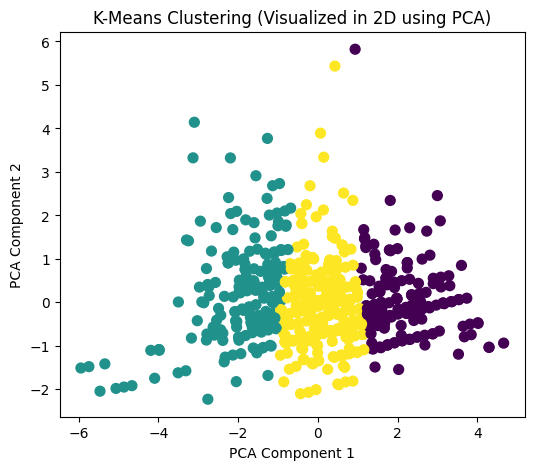

ASSIGNMENT 8: CLUSTER ANALYSIS RESULTS

Average values of each feature in every cluster:

            G1     G2     G3  studytime  absences
Cluster                                          
0        14.79  15.21  15.65       2.36      2.66
1         8.48   8.58   8.60       1.49      5.50
2        11.51  11.59  12.08       1.99      2.97

Interpretation:
Each cluster groups students with similar performance patterns.
For example, one cluster might have students with high grades and study time,
while another might include students with more absences and lower grades.

We used K-Means clustering to discover hidden patterns in student performance.
PCA helped us visualize these patterns in 2D for easier understanding.
This adds an unsupervised learning layer to our project —
helping us identify student groups (e.g., high performers, low performers, average group).



In [4]:
# -----------------------------
# WEEK 8: UNSUPERVISED LEARNING
# Dataset: students.csv
# -----------------------------

# Step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Step 2: Load dataset
df = pd.read_csv('/content/students.csv', sep=';')

# Step 3: Select numeric features for clustering
# We'll use academic-related columns for pattern finding
features = ['G1', 'G2', 'G3', 'studytime', 'absences']
X = df[features]

print("Selected Features for Clustering:", features, "\n")

# Step 4: Standardize data (to bring all values to same scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# CLASS TASK: K-MEANS CLUSTERING & PCA DEMO
# -----------------------------
print("CLASS TASK: K-MEANS CLUSTERING & PCA DEMO\n")

# Step 5: Apply K-Means clustering
# We’ll try grouping students into 3 clusters (you can change n_clusters if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Each student is now assigned to a cluster (0, 1, or 2)\n")

# Step 6: PCA (Principal Component Analysis) for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print("PCA transformation done. Data reduced to 2D for visualization.\n")

# Step 7: Visualize clusters using PCA
plt.figure(figsize=(6,5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (Visualized in 2D using PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# -----------------------------
# ASSIGNMENT 8: CLUSTER ANALYSIS
# -----------------------------
print("ASSIGNMENT 8: CLUSTER ANALYSIS RESULTS\n")

cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("Average values of each feature in every cluster:\n")
print(cluster_summary)
print("\nInterpretation:")
print("Each cluster groups students with similar performance patterns.")
print("For example, one cluster might have students with high grades and study time,")
print("while another might include students with more absences and lower grades.\n")

# -----------------------------
# PROJECT MILESTONE
# -----------------------------
print("We used K-Means clustering to discover hidden patterns in student performance.")
print("PCA helped us visualize these patterns in 2D for easier understanding.")
print("This adds an unsupervised learning layer to our project —")
print("helping us identify student groups (e.g., high performers, low performers, average group).\n")
